In [323]:
#Maya Rao
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
tit = pd.read_csv("titanic.csv")

In [181]:
#first five columns
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [182]:
#data types of each column
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [183]:
#remove these rows
tit.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], axis = 1, inplace = True)
tit

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [184]:
#put survived last
cols = tit.columns.tolist()
cols.insert(6,cols.pop(cols.index('Survived')))
tit = tit.reindex(columns = cols)
tit

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,0
887,1,female,19.0,0,0,30.0000,1
888,3,female,NaN,1,2,23.4500,0
889,1,male,26.0,0,0,30.0000,1


In [185]:
#change sex values
tit = tit.replace({'Sex': 'male'}, 1)
tit = tit.replace({'Sex': 'female'},0)
tit.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


In [186]:
#display data types again
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Survived  891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


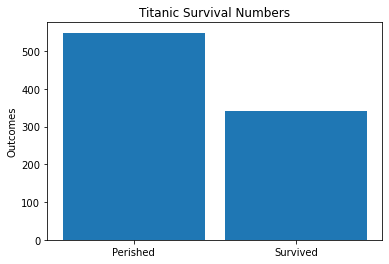

In [187]:
counts = tit['Survived'].value_counts()
plt.bar(x=[0,.4], height=counts, width = 0.35)
plt.xticks([0,.4], ("Perished", 'Survived'))
plt.ylabel('Outcomes')
plt.title('Titanic Survival Numbers')
plt.show()

In [196]:
mean = tit.mean()
mean

Pclass       2.308642
Sex          0.647587
Age         29.699118
SibSp        0.523008
Parch        0.381594
Fare        32.204208
Survived     0.383838
dtype: float64

In [206]:
avg = tit.groupby(tit['Survived']).mean()
avg

,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,,,,,,
0,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1.950292,0.318713,28.343690,0.473684,0.464912,48.395408


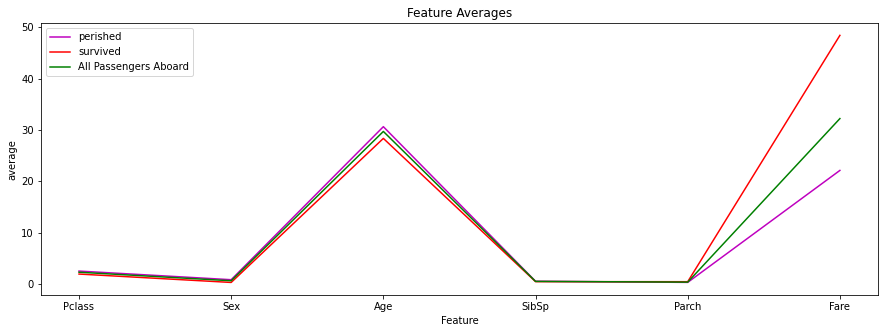

In [215]:
plt.figure(figsize=(15,5))
cols = tit.columns.tolist()
cols = cols[0:6]
mean = mean[0:6]
plt.plot(cols,avg.iloc[0],'m',label="perished")
plt.plot(cols,avg.iloc[1],'r',label = "survived")
plt.plot(cols,mean,'g',label = "All Passengers Aboard")
plt.title("Feature Averages")
plt.xlabel("Feature")
plt.ylabel("average")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Fare')

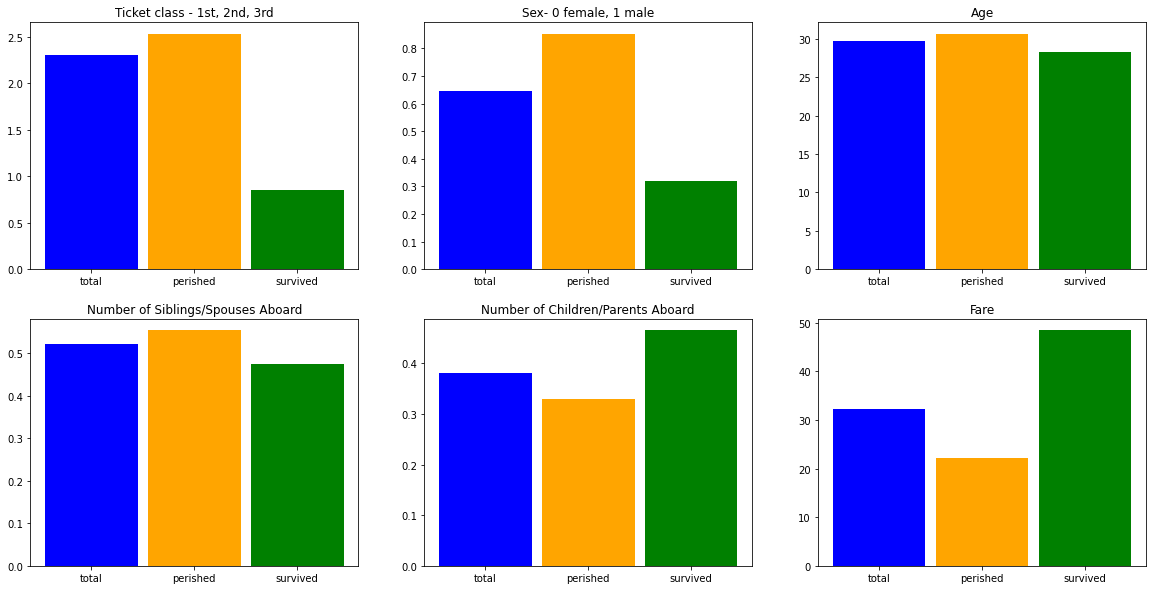

In [300]:
fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(20,10))

vals = [mean[0],avg.iloc[0][0],avg.iloc[0][1]]
ax[0,0].bar(["total","perished","survived"], vals, width = 0.9, color = ['blue','orange','green'],label = "Total")
ax[0,0].set_title("Ticket class - 1st, 2nd, 3rd")



vals = [mean[1],avg.iloc[0][1],avg.iloc[1][1]]
ax[0,1].bar(["total","perished","survived"], vals, width = 0.9,color = ['blue','orange','green'])
ax[0,1].set_title("Sex- 0 female, 1 male")

vals = [mean[2],avg.iloc[0][2],avg.iloc[1][2]]
ax[0,2].bar(["total","perished","survived"], vals, width = 0.9,color = ['blue','orange','green'])
ax[0,2].set_title("Age")

vals = [mean[3],avg.iloc[0][3],avg.iloc[1][3]]
ax[1,0].bar(["total","perished","survived"], vals, width = 0.9,color = ['blue','orange','green'])
ax[1,0].set_title("Number of Siblings/Spouses Aboard")

vals = [mean[4],avg.iloc[0][4],avg.iloc[1][4]]
ax[1,1].bar(["total","perished","survived"], vals, width = 0.9,color = ['blue','orange','green'])
ax[1,1].set_title("Number of Children/Parents Aboard")

vals = [mean[5],avg.iloc[0][5],avg.iloc[1][5]]
ax[1,2].bar(["total","perished","survived"], vals, width = 0.9,color = ['blue','orange','green'])
ax[1,2].set_title("Fare")

In [303]:
tit.corr()['Survived']

Pclass     -0.338481
Sex        -0.543351
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

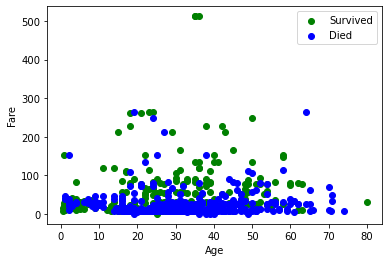

In [322]:
ageSurv = []
ageDie = []
fareSurv = []
fareDie = []
for x in range(len(tit['Age'])):
    if 0 == tit['Survived'][x]:
        ageDie.append(tit['Age'][x])
        fareDie.append(tit['Fare'][x])
    if 1 == tit['Survived'][x] :
        fareSurv.append(tit['Fare'][x])
        ageSurv.append(tit['Age'][x])
        
plt.scatter(ageSurv,fareSurv, color = "green", label = "Survived")
plt.scatter(ageDie,fareDie, color = "blue", label = "Died")
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.show()

In [318]:
ageSurv = []
ageDie = []
fareSurv = []
fareDie = []
for x in range(len(tit['Age'])):
    if 0 == tit['Survived'][x]:
        ageDie.append(tit['Age'][x])
        fareDie.append(tit['Fare'][x])
    if 1 == tit['Survived'][x] :
        fareSurv.append(tit['Fare'][x])
        fareDie.append(tit['Fare'][x])
